In [7]:
import os
 
dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)

current directory is : c:\
Directory name is : 


In [1585]:
import os
import glob
import pandas

path = 'C:/Users/Christopher/Documents/GitHub/Fall2_Homework/data/Well Data_Split/'
extension = 'csv'
os.chdir(path)
result = [i for i in glob.glob('*.{}'.format(extension))]
print(result)

['F-179.csv', 'F-319.csv', 'F-45.csv', 'G-1220.csv', 'G-1260_Done.csv', 'G-2147.csv', 'G-2866.csv', 'G-3549.csv', 'G-561.csv', 'G-580A.csv', 'G-852_NO_TIDE.csv', 'G-860.csv', 'PB-1680.csv', 'Well Coords.csv']


# Read file

In [487]:
# Dont do number 4
# Next to do: g1260, 11 (NO TIDE)

In [488]:
start = '2007-10-01 01:00:00'
end = '2018-06-08 11:00:00'
time_range = pd.date_range(start=start, end=end,freq='H')

In [1543]:
file = result[0]
df = pd.read_csv(file, delimiter="\t")

#if 'Code' in df:
  # df = df[df.Code == "A"]
file

C:\Users\Christopher\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,4,5,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


'F-179.csv'

In [1489]:
df.Code.describe()

count     253925
unique         1
top            A
freq      253925
Name: Code, dtype: object

In [1242]:
df = df[df.Code != "P"]

In [1243]:
df.Code.unique()

array(['A', nan], dtype=object)

In [1546]:
df[~df.Well_ft.isna()].tail()

,TideDateHour,Date,Time,Tide_ft,WellDateHour,date,time,tz_cd,Well_ft,Code,Corrected,RainDateHour,Date.1,RAIN_FT
253920,NaN,NaN,NaN,NaN,2018/06/04 09:00,6/4/2018,9:45,EDT,2.43,A,0.881,12/28/2014 1:00,12/28/2014 1:00,0.0
253921,NaN,NaN,NaN,NaN,2018/06/04 10:00,6/4/2018,10:00,EDT,2.43,A,0.881,12/28/2014 1:00,12/28/2014 1:15,0.0
253922,NaN,NaN,NaN,NaN,2018/06/04 10:00,6/4/2018,10:15,EDT,2.43,A,0.881,12/28/2014 1:00,12/28/2014 1:30,0.0
253923,NaN,NaN,NaN,NaN,2018/06/04 10:00,6/4/2018,10:30,EDT,2.40,A,0.851,12/28/2014 1:00,12/28/2014 1:45,0.0
253924,NaN,NaN,NaN,NaN,2018/06/04 10:00,6/4/2018,10:45,EDT,2.40,A,0.851,12/28/2014 2:00,12/28/2014 2:00,0.0


# Aggregate Tide Water Elevation

In [1491]:
#%% Create a set format for which to read the string as a datetime variable

#df['TideDateHour'] = df.loc[:, 'DateHour']
#df['Tide_ft'] = df.loc[:, 'TideLevel']
tide = df.loc[:, ['TideDateHour', 'Tide_ft']]

tide = tide.loc[tide.TideDateHour != '1900/01/00 00:00']

time_format = "%m/%d/%Y %H:%M"

tide['TideDateHour'] = pd.to_datetime(tide.loc[:,'TideDateHour'], format = time_format)

#%% Reorganize the column order
#df = df[['date_hour','date','time','Corrected']]

#%% Setting index to be the date_hour column
tide = tide.set_index('TideDateHour')

#%% Select dates in the range required
data_tide = tide['2007-10-01 01:00:00':'2018-06-08 11:00:00']

#%% Resample data to hourly
data_tide = data_tide.resample('H').mean()

In [1492]:
df.head()

,TideDateHour,Date,Time,Tide_ft,WellDateHour,date,time,tz_cd,Well_ft,Code,Corrected,RainDateHour,Date.1,RAIN_FT
0,10/1/2007 1:00,10/1/2007,1:00,0.965,2007/10/01 01:00,10/1/2007,1:00,EDT,3.17,A,1.621,10/1/2007 1:00,10/1/2007 1:00,0.002167
1,10/1/2007 2:00,10/1/2007,2:00,0.358,2007/10/01 01:00,10/1/2007,1:15,EDT,3.18,A,1.631,10/1/2007 1:00,10/1/2007 1:15,0.002333
2,10/1/2007 3:00,10/1/2007,3:00,-0.144,2007/10/01 01:00,10/1/2007,1:30,EDT,3.18,A,1.631,10/1/2007 1:00,10/1/2007 1:30,0.001667
3,10/1/2007 4:00,10/1/2007,4:00,-0.623,2007/10/01 01:00,10/1/2007,1:45,EDT,3.18,A,1.631,10/1/2007 1:00,10/1/2007 1:45,0.000917
4,10/1/2007 5:00,10/1/2007,5:00,-0.994,2007/10/01 02:00,10/1/2007,2:00,EDT,3.18,A,1.631,10/1/2007 2:00,10/1/2007 2:00,0.003333


In [1496]:
# Aggregate Rain

#%% Create a set format for which to read the string as a datetime variable
rain = df.loc[:, ['RainDateHour', 'RAIN_FT']]

time_format = "%m/%d/%Y %H:%M"

rain['RainDateHour'] = pd.to_datetime(rain['RainDateHour'], format = time_format)

#%% Reorganize the column order
#df = df[['date_hour','date','time','Corrected']]

#%% Setting index to be the date_hour column
rain = rain.set_index('RainDateHour')

#%% Select dates in the range required
data_rain = rain['2007-10-01 01:00:00':'2018-06-08 11:00:00']

#%% Resample data to hourly
data_rain = data_rain.resample('H').mean()

# Aggregate Well

#%% Create a set format for which to read the string as a datetime variable
well = df.loc[:, ['WellDateHour', 'Well_ft']]

time_format = "%Y/%m/%d %H:%M"

well = well.loc[well.WellDateHour != '1900/01/00 00:00']
well['WellDateHour'] = pd.to_datetime(well['WellDateHour'], format = time_format)

#%% Reorganize the column order
#df = df[['date_hour','date','time','Corrected']]

#%% Setting index to be the date_hour column
well = well.set_index('WellDateHour')

#%% Select dates in the range required
data_narrow = well['2007-10-01 01:00:00':'2018-06-08 11:00:00']

#%% Resample data to hourly
data_well = data_narrow.resample('H').mean()

data_well['Well_ft'] = data_well.Well_ft.interpolate()

# Merge all of the data into one table and save

In [1497]:
file

'F-179.csv'

In [1498]:
len(time_range)

93683

In [1499]:
full = pd.DataFrame(index=pd.DatetimeIndex(time_range))

In [1500]:
full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93683 entries, 2007-10-01 01:00:00 to 2018-06-08 11:00:00
Freq: H
Empty DataFrame

In [1501]:
full['Well_ft'] = data_well['Well_ft']
full['Tide_ft'] = data_tide['Tide_ft']
full['Rain_ft'] = data_rain['RAIN_FT']
full.index.name = 'DateHour'

In [1502]:
full.Tide_ft.interpolate(inplace=True)
full.Rain_ft.interpolate(inplace=True)
full.Well_ft.interpolate(inplace=True)

# Fill in empty begininngs and ends
avg_tide = full.Tide_ft.mean()
full.Tide_ft.fillna(value=avg_tide, inplace=True)
full.Tide_ft.fillna(value=avg_tide, inplace=True)

full.Rain_ft.fillna(value=0, inplace=True)
full.Rain_ft.fillna(value=0, inplace=True)

avg_well = full.Well_ft.mean()
full.Well_ft.fillna(value=avg_well, inplace=True)
full.Well_ft.fillna(value=avg_well, inplace=True)


In [1503]:
assert not sum(full.Tide_ft.isna())
assert not sum(full.Rain_ft.isna())
assert not sum(full.Well_ft.isna())

In [1504]:
full.loc['09/10/2017 05:00:00':, 'Rain_ft'].head()

DateHour
2017-09-10 05:00:00    0.004583
2017-09-10 06:00:00    0.012292
2017-09-10 07:00:00    0.004792
2017-09-10 08:00:00    0.004375
2017-09-10 09:00:00    0.006250
Freq: H, Name: Rain_ft, dtype: float64

In [1505]:
new_file = "final_wells/" + file[0:len(file)-4].replace("-", "") + "_ALL.csv"

In [1506]:
new_file

'final_wells/F179_ALL.csv'

In [1507]:
full.to_csv(new_file, index=True)

# Incorporate Predicted Well Water Elevation After SAS Prediction

In [1586]:
file = result[0]
well = file[:len(file)-4].replace("_", "").replace("-", "")
well_name = "Well " + well #file[:len(file)-9]
print(well_name)
print(well)

Well F179
F179


In [1587]:
pred = pd.read_sas("C:/Users/Christopher/Documents/GitHub/Fall2_Homework/data/Well Data_Split/final_wells/" + str(well) + "_all_pred.sas7bdat")
full = pd.read_csv("C:/Users/Christopher/Documents/GitHub/Fall2_Homework/data/Well Data_Split/final_wells/" + str(well) + "_ALL.csv", index_col='DateHour')
pred.set_index(full.index, inplace=True)

full[well_name + " Well Level"] = full.Well_ft
full[well_name + " Tide Level"] = full.Tide_ft
full[well_name + " Rain Level"] = full.Rain_ft
full[well_name + " Predicted Well Level"] = pred['FORECAST']
full[well_name + " Lower 95% Confidence Interval"] = pred.L95
full[well_name + " Upper 95% Confidence Interval"] = pred.U95

In [1588]:
full[well_name + " Well Level"] = full.Well_ft
full[well_name + " Tide Level"] = full.Tide_ft
full[well_name + " Rain Level"] = full.Rain_ft
full[well_name + " Predicted Well Level"] = pred['FORECAST']
full[well_name + " Lower 95% Confidence Interval"] = pred.L95
full[well_name + " Upper 95% Confidence Interval"] = pred.U95

In [1589]:
pred = pd.read_sas("C:/Users/Christopher/Documents/GitHub/Fall2_Homework/data/Well Data_Split/final_wells/" + str(well) + "_all_pred.sas7bdat")
full = pd.read_csv("C:/Users/Christopher/Documents/GitHub/Fall2_Homework/data/Well Data_Split/final_wells/" + str(well) + "_ALL.csv", index_col='DateHour')
pred.set_index(full.index, inplace=True)

full[well_name + " Well Level"] = full.Well_ft
full[well_name + " Tide Level"] = full.Tide_ft
full[well_name + " Rain Level"] = full.Rain_ft
full[well_name + " Predicted Well Level"] = pred['FORECAST']
full[well_name + " Lower 95% Confidence Interval"] = pred.L95
full[well_name + " Upper 95% Confidence Interval"] = pred.U95

full.head()

,Well_ft,Tide_ft,Rain_ft,Well F179 Well Level,Well F179 Tide Level,Well F179 Rain Level,Well F179 Predicted Well Level,Well F179 Lower 95% Confidence Interval,Well F179 Upper 95% Confidence Interval
DateHour,,,,,,,,,
2007-10-01 01:00:00,3.1775,0.965,0.001771,3.1775,0.965,0.001771,NaN,NaN,NaN
2007-10-01 02:00:00,3.1900,0.358,0.002146,3.1900,0.358,0.002146,NaN,NaN,NaN
2007-10-01 03:00:00,3.2075,-0.144,0.005104,3.2075,-0.144,0.005104,NaN,NaN,NaN
2007-10-01 04:00:00,3.2275,-0.623,0.004792,3.2275,-0.623,0.004792,NaN,NaN,NaN
2007-10-01 05:00:00,3.2550,-0.994,0.002188,3.2550,-0.994,0.002188,3.289012,3.26923,3.308793


In [1590]:
full.tail(168)

,Well_ft,Tide_ft,Rain_ft,Well F179 Well Level,Well F179 Tide Level,Well F179 Rain Level,Well F179 Predicted Well Level,Well F179 Lower 95% Confidence Interval,Well F179 Upper 95% Confidence Interval
DateHour,,,,,,,,,
2018-06-01 12:00:00,2.6600,-0.492,0.0,2.6600,-0.492,0.0,2.655513,2.635732,2.675294
2018-06-01 13:00:00,2.6600,-0.909,0.0,2.6600,-0.909,0.0,2.650912,2.617594,2.684230
2018-06-01 14:00:00,2.6600,-1.280,0.0,2.6600,-1.280,0.0,2.646642,2.603412,2.689871
2018-06-01 15:00:00,2.6525,-1.640,0.0,2.6525,-1.640,0.0,2.643451,2.592062,2.694840
2018-06-01 16:00:00,2.6300,-1.883,0.0,2.6300,-1.883,0.0,2.640604,2.581970,2.699238
2018-06-01 17:00:00,2.6300,-1.982,0.0,2.6300,-1.982,0.0,2.637415,2.572018,2.702812
2018-06-01 18:00:00,2.6300,-1.821,0.0,2.6300,-1.821,0.0,2.633813,2.561970,2.705655
2018-06-01 19:00:00,2.6225,-1.404,0.0,2.6225,-1.404,0.0,2.630403,2.552491,2.708315
2018-06-01 20:00:00,2.6200,-0.928,0.0,2.6200,-0.928,0.0,2.627112,2.543454,2.710771


In [1591]:
#full = full.iloc[:, 3:]
full.to_csv("C:/Users/Christopher/Documents/GitHub/Fall2_Homework/data/Well Data_Split/final_wells/" + str(well) + "_FINAL.csv", index=True)

# Aggregate all data

In [1592]:
import os
import glob
import pandas

path = 'C:/Users/Christopher/Documents/GitHub/Fall2_Homework/data/Well Data_Split/final_wells/'
extension = 'csv'
os.chdir(path)
result = [i for i in glob.glob('*.{}'.format(extension))]

term = result[1]
print(term)
result = [i for i in result if i[(len(i)-9):len(i)] == "FINAL.csv"]
print(result)

F179_ALL.csv
['F179_FINAL.csv', 'F319_FINAL.csv', 'F45_FINAL.csv', 'G1220_FINAL.csv', 'G1260_FINAL.csv', 'G2147_FINAL.csv', 'G2866_FINAL.csv', 'G3549_FINAL.csv', 'G561_FINAL.csv', 'G580A_FINAL.csv', 'G860_FINAL.csv', 'PB1680_FINAL.csv']


In [1519]:
df.loc[df['DateHour'] == '2017-09-10 15:00:00', ['Rain Level', 'Well Level', 'Predicted Well Level']]

,Rain Level,Well Level,Predicted Well Level
87182,0.00125,4.92,2.680768


In [1605]:
i=4
well = pd.read_csv(path + result[i])

new_df = {
    'DateHour': well.iloc[:, 0],
    'Well Level': well.iloc[:, 1],
    'Tide Level': well.iloc[:, 2],
    'Rain Level': well.iloc[:, 3],
    'Predicted Well Level': well.iloc[:,7],
    'Well Name': pd.Series([result[i][:len(result[i])-10] for name in range(len(well))])
}
#print(well.head())
#df = pd.DataFrame(new_df)

df = df.append(pd.DataFrame(new_df))
print(df.tail())
print(len(df))

                  DateHour  Predicted Well Level  Rain Level  Tide Level  \
93678  2018-06-08 07:00:00               6.97874         0.0      -0.406   
93679  2018-06-08 08:00:00               6.97631         0.0      -0.828   
93680  2018-06-08 09:00:00               6.97281         0.0      -1.306   
93681  2018-06-08 10:00:00               6.96875         0.0      -1.715   
93682  2018-06-08 11:00:00               6.96466         0.0      -2.008   

       Well Level Well Name  
93678      6.7445     G1260  
93679      6.7295     G1260  
93680      6.7195     G1260  
93681      6.7120     G1260  
93682      6.7120     G1260  
1124196


In [1571]:
df.tail()

,DateHour,Predicted Well Level,Rain Level,Tide Level,Well Level,Well Name
93678,2018-06-08 07:00:00,1.903581,0.0,-1.937,2.25,PB1680
93679,2018-06-08 08:00:00,1.901592,0.0,-1.937,2.25,PB1680
93680,2018-06-08 09:00:00,1.899601,0.0,-1.937,2.25,PB1680
93681,2018-06-08 10:00:00,1.897614,0.0,-1.937,2.25,PB1680
93682,2018-06-08 11:00:00,1.895638,0.0,-1.937,2.25,PB1680


In [1606]:
len(df)/12

93683.0

In [1607]:
df['Well Name'].unique()

array(['F179', 'F319', 'F45', 'G1220', 'G2147', 'G2866', 'G3549', 'G561',
       'G580A', 'G860', 'PB1680', 'G1260'], dtype=object)

In [1454]:
0.008819*12

0.105828

In [1453]:
test['2008 July 8 00:00:00']

,DateHour,Predicted Well Level,Rain Level,Tide Level,Well Level,Well Name
DateHour,,,,,,
2008-07-08,2008-07-08 00:00:00,2.409600,0.000000,0.194,2.420,F179
2008-07-08,2008-07-08 00:00:00,2.552621,0.000000,0.194,2.540,F319
2008-07-08,2008-07-08 00:00:00,2.384075,0.000000,-1.212,2.390,F45
2008-07-08,2008-07-08 00:00:00,1.518461,0.000000,0.307,1.520,G1220
2008-07-08,2008-07-08 00:00:00,3.793960,0.105833,-0.976,3.792,G1260
2008-07-08,2008-07-08 00:00:00,4.256672,0.020208,0.126,4.210,G2147
2008-07-08,2008-07-08 00:00:00,6.277313,0.032292,0.126,6.280,G2866
2008-07-08,2008-07-08 00:00:00,2.127667,0.000000,-0.436,2.130,G3549
2008-07-08,2008-07-08 00:00:00,1.952280,0.000000,0.307,1.970,G561


ValueError: cannot reindex from a duplicate axis

In [1573]:
df.loc[df['Well Name'] == 'F179', ['DateHour', 'Well Level', 'Predicted Well Level']].

,DateHour,Well Level,Predicted Well Level
93515,2018-06-01 12:00:00,2.6600,2.679913
93516,2018-06-01 13:00:00,2.6600,2.679716
93517,2018-06-01 14:00:00,2.6600,2.679532
93518,2018-06-01 15:00:00,2.6525,2.679644
93519,2018-06-01 16:00:00,2.6300,2.679745
93520,2018-06-01 17:00:00,2.6300,2.679711
93521,2018-06-01 18:00:00,2.6300,2.679655
93522,2018-06-01 19:00:00,2.6225,2.679549
93523,2018-06-01 20:00:00,2.6200,2.679441
93524,2018-06-01 21:00:00,2.6200,2.679199


In [1578]:
import matplotlib.pyplot as plt
%matplotlib inline

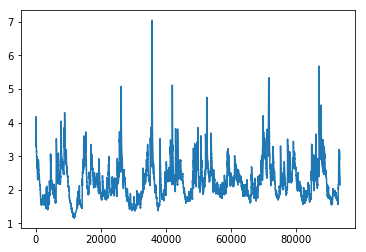

In [1608]:
df.loc[df['Well Name'] == 'F179', 'Predicted Well Level'].plot()

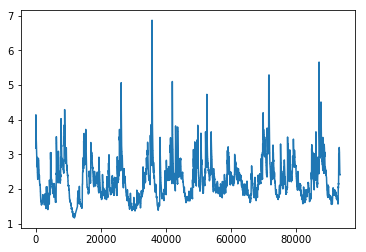

In [1609]:
df.loc[df['Well Name'] == 'F179', 'Well Level'].plot()

In [1610]:
df.to_csv(path + "Combined.csv", index=False)

In [1611]:
#Get MAPE for each well prediction
# Mean(yi - yhat / yi)
test = df.set_index(pd.DatetimeIndex(df.DateHour))
test = test['2018-06-01 12:00:00':'2018-06-08 11:00:00']
test['res'] = abs(test['Well Level'] - test['Predicted Well Level'])/abs(test['Well Level'])

mapes = test.groupby('Well Name')['res'].mean()

In [1612]:
mapes


Well Name
F179      0.033246
F319      0.036506
F45       0.080028
G1220     0.001069
G1260     0.043546
G2147     0.016720
G2866     0.030494
G3549     0.049740
G561      0.107245
G580A     0.042471
G860      0.038250
PB1680    0.080840
Name: res, dtype: float64

# Testing for missing rain data 10/24

In [922]:
df.set_index(pd.DatetimeIndex(df['DateHour']), inplace=True)

In [953]:
sub1 = df.loc['11/04/2010 11:00:00':]
sub1 = sub1[sub1['Well Name'] == "G3549"]

In [933]:
sub = pd.read_csv(path + "../G-3549.csv")

C:\Users\Christopher\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,4,5,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [935]:
sub.set_index(pd.DatetimeIndex(sub.RainDateHour), inplace=True)

In [946]:
sub = sub.loc['11/04/2010 11:00:00':'11/04/2017']